In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import pickle
import time
import multiprocessing
from multiprocessing import Pool

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

In [2]:
spectra = np.load('/kaggle/input/pyatmos/trans_spectras_r1000.npy')
logH2O_vmr = np.load('/kaggle/input/pyatmos/params_logH20.npy')
wvl = np.load('/kaggle/input/pyatmos/trans_spectras_r1000.npy')

In [3]:
spectra.shape,logH2O_vmr.shape,wvl.shape


((10000, 5115), (10000, 1), (10000, 5115))

In [4]:
x_train = spectra[:8000,1:-1]
y_train = logH2O_vmr[:8000,:]

x_test = spectra[8000:10000,1:-1]
y_test = logH2O_vmr[8000:10000,:]

In [8]:
X_scaledTrain = x_train

X_scaledTest = x_test

X_scaledTrain.shape, X_scaledTest.shape

((8000, 5113), (2000, 5113))

In [9]:
y_scaledTrain = y_train

y_scaledTest = y_test

In [10]:
#Convert features into timesteps
sample_size = X_scaledTrain.shape[0]
time_steps = X_scaledTrain.shape[1]
input_dimension = 1

X_reTrain = X_scaledTrain.reshape(sample_size, time_steps, input_dimension)
X_reTest = X_scaledTest.reshape(X_scaledTest.shape[0], X_scaledTest.shape[1], input_dimension)

print(X_reTrain.shape)
print(X_reTrain[0].shape)
print((X_reTest.shape))

(8000, 5113, 1)
(5113, 1)
(2000, 5113, 1)


In [11]:
#def convModel():
n_timesteps = X_reTrain.shape[1]
n_features = X_reTrain.shape[2]
model = Sequential()
model.add(tf.keras.layers.InputLayer(shape=(n_timesteps, n_features)))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.11))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.09))
model.add(Dense(1))
    
opt = tf.keras.optimizers.Adam(0.9e-3)
    
model.compile(loss='mse', optimizer=opt, metrics=['mae','r2_score'])

In [12]:
hist=model.fit(X_reTrain, y_scaledTrain, epochs=50,batch_size=32,
                    validation_split=0.2,shuffle=False)

Epoch 1/50
  2/200 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 14.0518 - mae: 3.1720 - r2_score: -2.4907 

I0000 00:00:1712004386.885688      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712004386.906023      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - loss: 5.4364 - mae: 1.9532 - r2_score: -0.3080 - val_loss: 4.1658 - val_mae: 1.7745 - val_r2_score: -0.0027
Epoch 2/50


W0000 00:00:1712004396.293594      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 4.4974 - mae: 1.8203 - r2_score: -0.0792 - val_loss: 4.1513 - val_mae: 1.7693 - val_r2_score: 7.7409e-04
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 4.4533 - mae: 1.8173 - r2_score: -0.0688 - val_loss: 4.0781 - val_mae: 1.7478 - val_r2_score: 0.0184
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 4.2303 - mae: 1.7566 - r2_score: -0.0152 - val_loss: 3.2008 - val_mae: 1.4923 - val_r2_score: 0.2296
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 2.5708 - mae: 1.2641 - r2_score: 0.3825 - val_loss: 0.2977 - val_mae: 0.4422 - val_r2_score: 0.9283
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6182 - mae: 0.6163 - r2_score: 0.8515 - val_loss: 0.2343 - val_mae: 0.4377 - val_r2_score: 0.9436
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.2251 - mae: 0.3512 - r2_score: 0.9459 - val_loss: 0.1852 - val_mae: 0.4018 - val_r2_score: 0.9554
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━

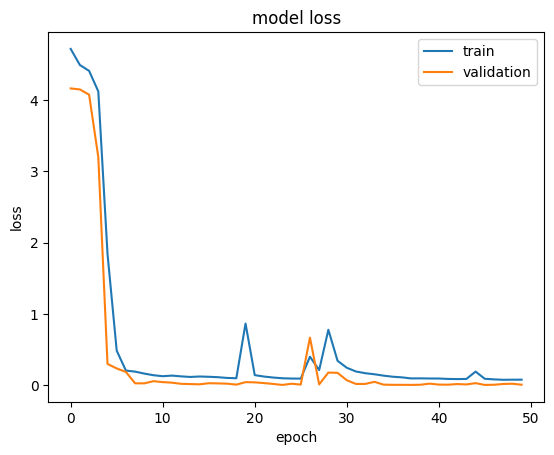

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

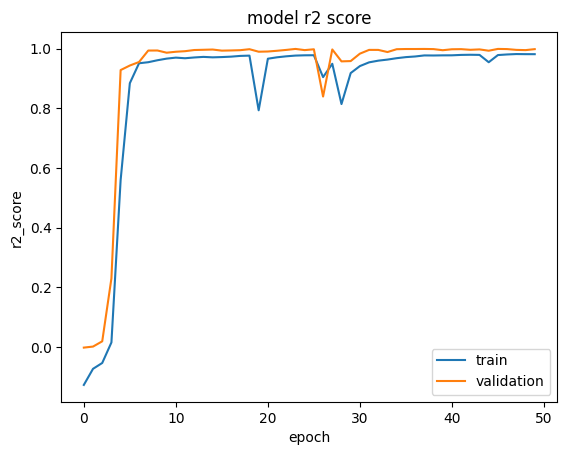

In [14]:
plt.plot(hist.history['r2_score'])
plt.plot(hist.history['val_r2_score'])
plt.title('model r2 score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [15]:
test_loss,test_mae,test_r2_score = model.evaluate(X_reTest,y_scaledTest)

28/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mae: 0.0663 - r2_score: 0.9986

W0000 00:00:1712004791.233830      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0059 - mae: 0.0665 - r2_score: 0.9986


In [16]:
predictions = model.predict(X_reTest).flatten()
predictions.shape 

62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1712004793.631183      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


(2000,)

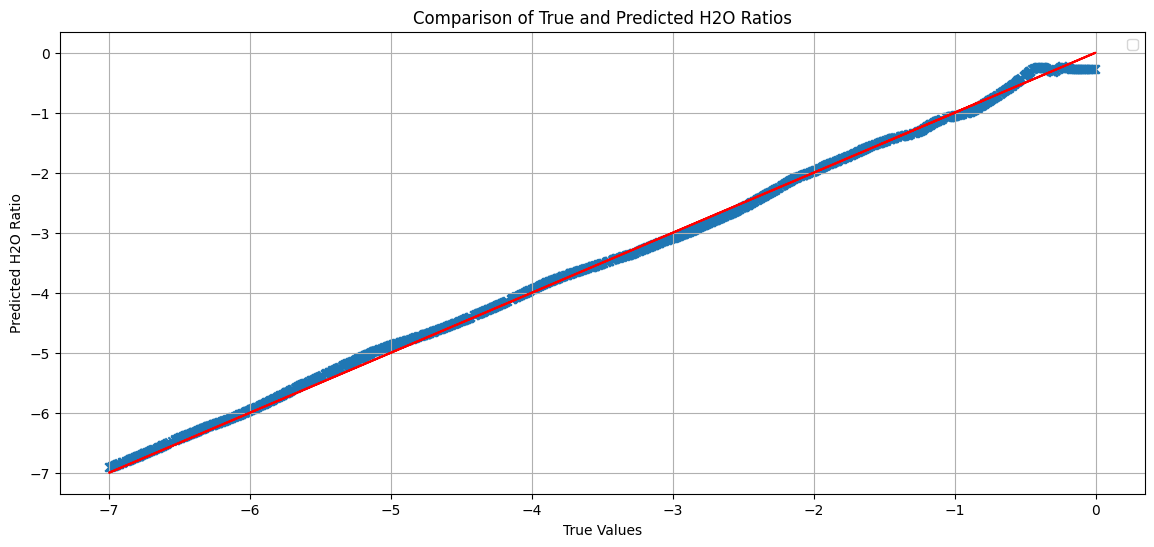

In [17]:
plt.figure(figsize=(14, 6))
plt.scatter(y_scaledTest,predictions, marker='x')
plt.plot(y_scaledTest, y_scaledTest, color='red')
plt.title('Comparison of True and Predicted H2O Ratios')
plt.xlabel('True Values')
plt.ylabel('Predicted H2O Ratio')
plt.legend()
plt.grid(True)
plt.show()

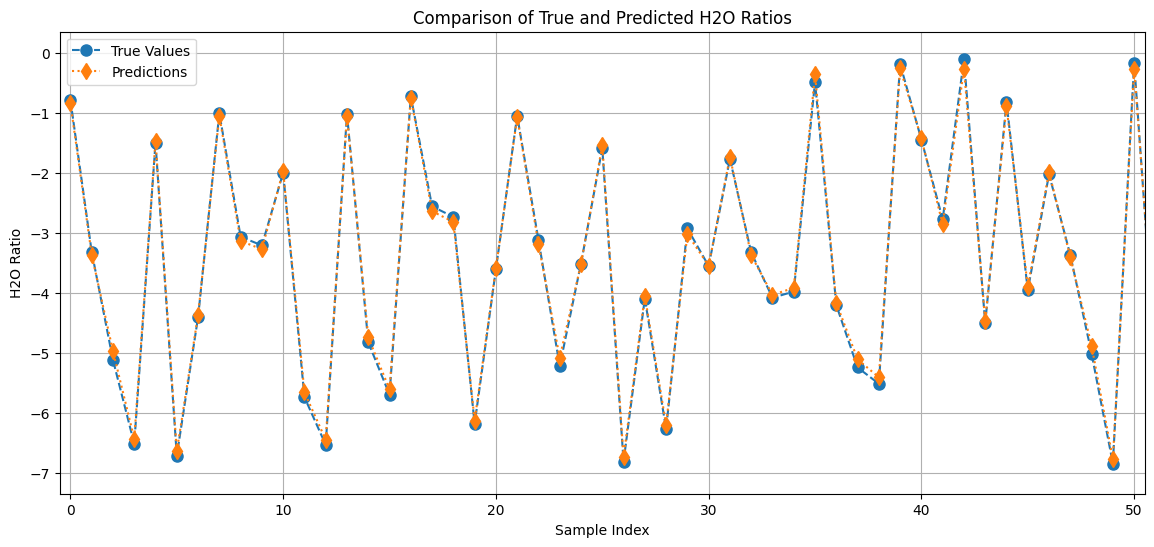

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(y_scaledTest, label='True Values', marker='o', linestyle='--', markersize=8)
plt.plot(predictions, label='Predictions', marker='d', linestyle='dotted', markersize=8)
plt.title('Comparison of True and Predicted H2O Ratios')
plt.xlabel('Sample Index')
plt.ylabel('H2O Ratio')
plt.legend()
plt.grid(True)
plt.xlim(-0.5,50.5)
plt.show()